# Bug in tf.initializer

##### What is the default kernel initializer in tf.layers.conv2d and tf.layers.dense?

So the answer is: it uses the glorot_uniform_initializer. - rmeertens

The Glorot uniform initializer, also called Xavier uniform initializer:
$$
\mbox{Glorot_uniform_initializer} 
= \mbox{Uniform}\left(-\mbox{limit}, \mbox{limit}\right),\quad
\mbox{limit} = \sqrt{\frac{6}{\mbox{fan_in} + \mbox{fan_out}}}
$$
https://www.tensorflow.org/api_docs/python/tf/glorot_uniform_initializer

The Glorot normal initializer, also called Xavier normal initializer:
$$
\mbox{Glorot_normal_initializer} 
= \mbox{Truncated_normal}\left(0,\sigma^2\right),\quad
\sigma = \sqrt{\frac{2}{\mbox{fan_in} + \mbox{fan_out}}}\quad\mbox{NOP!!!}
$$
$$$$
$$
\mbox{Glorot_normal_initializer} 
= \mbox{Truncated_normal}\left(0,\sigma^2\right),\quad
\sigma = \sqrt{\frac{2}{\mbox{fan_in} + \mbox{fan_out}}} / .87962566103423978
$$
https://www.tensorflow.org/api_docs/python/tf/keras/initializers/glorot_normal

According to this course by Andrew Ng and the Xavier documentation, 
if you are using ReLU as activation function, 
better change the default weights initializer(which is Xavier uniform) to Xavier normal - xtluo

https://stackoverflow.com/questions/43284047/what-is-the-default-kernel-initializer-in-tf-layers-conv2d-and-tf-layers-dense

# tf.keras.initializers.glorot_uniform is ok

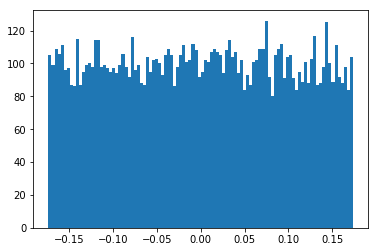

-0.17320508075688773 0.17320508075688773
-0.17317027 0.17318186


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# this line should be commented out for regular python run 
%matplotlib inline  
# this line should be commented out for regular python run

fan_in = 100
fan_out = 100
limit = np.sqrt(6 / (fan_in + fan_out))

tf.random.set_random_seed(337)

W = tf.get_variable("W", \
                    shape=(fan_in, fan_out), \
                    initializer=tf.keras.initializers.glorot_uniform)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    W_now = sess.run(W)
    
    plt.hist(W_now.reshape((-1,)), bins=100)
    plt.show()
    
    print(-limit, limit)
    print(np.min(W_now.reshape((-1,))), np.max(W_now.reshape((-1,))))

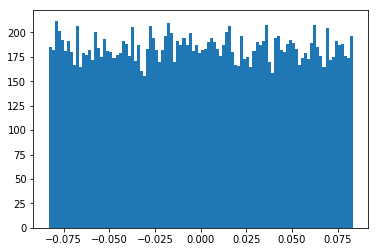

-0.08333333333333333 0.08333333333333333
-0.08331659 0.083322175


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# this line should be commented out for regular python run 
%matplotlib inline  
# this line should be commented out for regular python run

filter_size = 3
num_channel_in = 32
num_channel_out = 64

fan_in = filter_size * filter_size * num_channel_in
fan_out = filter_size * filter_size * num_channel_out 
limit = np.sqrt(6 / (fan_in + fan_out))

tf.random.set_random_seed(337)

W = tf.get_variable("W", \
                    shape=(filter_size, filter_size, num_channel_in, num_channel_out), \
                    initializer=tf.keras.initializers.glorot_uniform)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    W_now = sess.run(W)
    
    plt.hist(W_now.reshape((-1,)), bins=100)
    plt.show()
    
    print(-limit, limit)
    print(np.min(W_now.reshape((-1,))), np.max(W_now.reshape((-1,))))

# tf.keras.initializers.glorot_normal is not well-documented

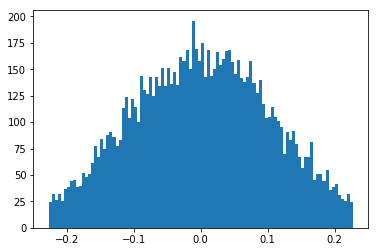

-0.2 0.2
-0.2273694468677113 0.2273694468677113
-0.22728574 0.22735965


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# this line should be commented out for regular python run 
%matplotlib inline  
# this line should be commented out for regular python run

fan_in = 100
fan_out = 100
sigma = np.sqrt(2 / (fan_in + fan_out))
sigma_used_in_truncated_normal = sigma / .87962566103423978

tf.random.set_random_seed(337)

W = tf.get_variable("W", \
                    shape=(fan_in, fan_out), \
                    initializer=tf.keras.initializers.glorot_normal)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    W_now = sess.run(W)
    
    plt.hist(W_now.reshape((-1,)), bins=100)
    plt.show()
    
    print(-2*sigma, 2*sigma)
    print(-2*sigma_used_in_truncated_normal, 2*sigma_used_in_truncated_normal)
    print(np.min(W_now.reshape((-1,))), np.max(W_now.reshape((-1,))))

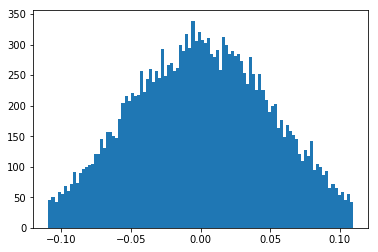

-0.09622504486493763 0.09622504486493763
-0.10939317612880786 0.10939317612880786
-0.10935291 0.10938847


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# this line should be commented out for regular python run 
%matplotlib inline  
# this line should be commented out for regular python run

filter_size = 3
num_channel_in = 32
num_channel_out = 64

fan_in = filter_size * filter_size * num_channel_in
fan_out = filter_size * filter_size * num_channel_out 
sigma = np.sqrt(2 / (fan_in + fan_out))
sigma_used_in_truncated_normal = sigma / .87962566103423978

tf.random.set_random_seed(337)

W = tf.get_variable("W", \
                    shape=(filter_size, filter_size, num_channel_in, num_channel_out), \
                    initializer=tf.keras.initializers.glorot_normal)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    W_now = sess.run(W)
    
    plt.hist(W_now.reshape((-1,)), bins=100)
    plt.show()
    
    print(-2*sigma, 2*sigma)
    print(-2*sigma_used_in_truncated_normal, 2*sigma_used_in_truncated_normal)
    print(np.min(W_now.reshape((-1,))), np.max(W_now.reshape((-1,))))

# tf.truncated_normal_initializer

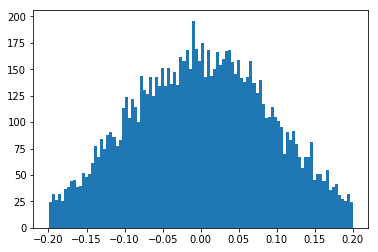

-0.2 0.2
-0.19992638 0.19999139


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# this line should be commented out for regular python run 
%matplotlib inline  
# this line should be commented out for regular python run

fan_in = 100
fan_out = 100
sigma = np.sqrt(2 / (fan_in + fan_out))

tf.random.set_random_seed(337)

W = tf.get_variable("W", \
                    shape=(fan_in, fan_out), \
                    initializer=tf.truncated_normal_initializer(stddev=sigma))

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    W_now = sess.run(W)
    
    plt.hist(W_now.reshape((-1,)), bins=100)
    plt.show()
    
    print(-2*sigma, 2*sigma)
    print(np.min(W_now.reshape((-1,))), np.max(W_now.reshape((-1,))))

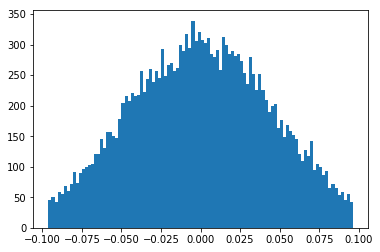

-0.09622504486493763 0.09622504486493763
-0.096189626 0.0962209


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# this line should be commented out for regular python run 
%matplotlib inline  
# this line should be commented out for regular python run

filter_size = 3
num_channel_in = 32
num_channel_out = 64

fan_in = filter_size * filter_size * num_channel_in
fan_out = filter_size * filter_size * num_channel_out 
sigma = np.sqrt(2 / (fan_in + fan_out))

tf.random.set_random_seed(337)

W = tf.get_variable("W", \
                    shape=(filter_size, filter_size, num_channel_in, num_channel_out), \
                    initializer=tf.truncated_normal_initializer(stddev=sigma))

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    W_now = sess.run(W)
    
    plt.hist(W_now.reshape((-1,)), bins=100)
    plt.show()
    
    print(-2*sigma, 2*sigma)
    print(np.min(W_now.reshape((-1,))), np.max(W_now.reshape((-1,))))